# ðŸ“Š EDA â€“ Telco Customer Churn
Analiza danych o klientach operatora komÃ³rkowego.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/telco.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [2]:
# Informacje o zbiorze danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Sprawdzenie problemÃ³w z TotalCharges (typ object, ale powinno byÄ‡ liczbowy)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

In [4]:
# UsuniÄ™cie wierszy z brakami
df.dropna(inplace=True)

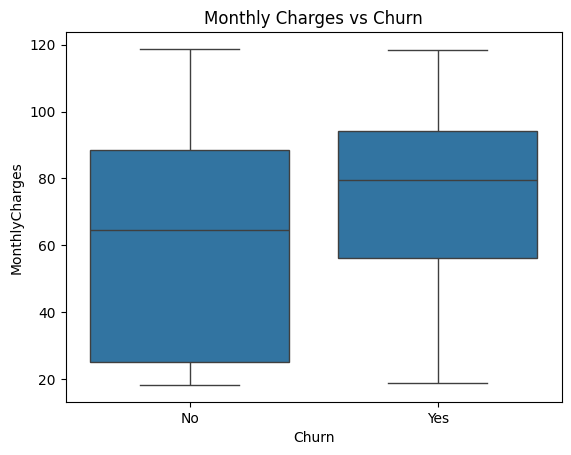

In [5]:
# Wizualizacja Churn vs MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

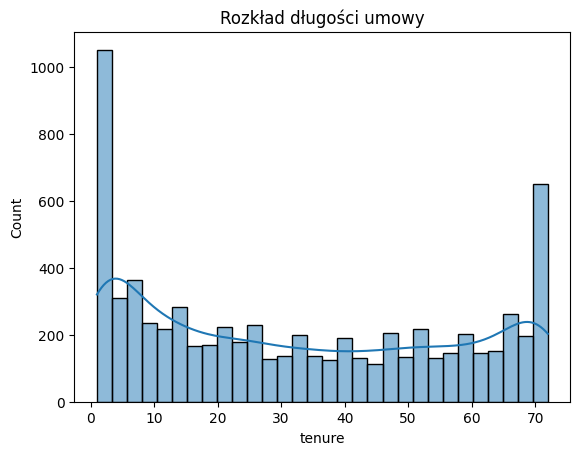

In [6]:
# RozkÅ‚ad dÅ‚ugoÅ›ci umowy (tenure)
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('RozkÅ‚ad dÅ‚ugoÅ›ci umowy')
plt.show()

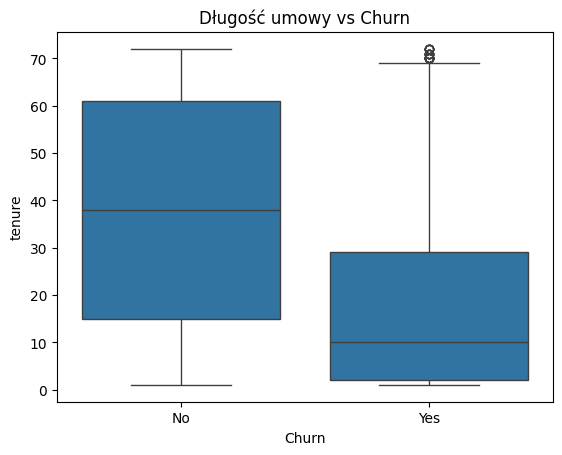

In [7]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('DÅ‚ugoÅ›Ä‡ umowy vs Churn')
plt.show()

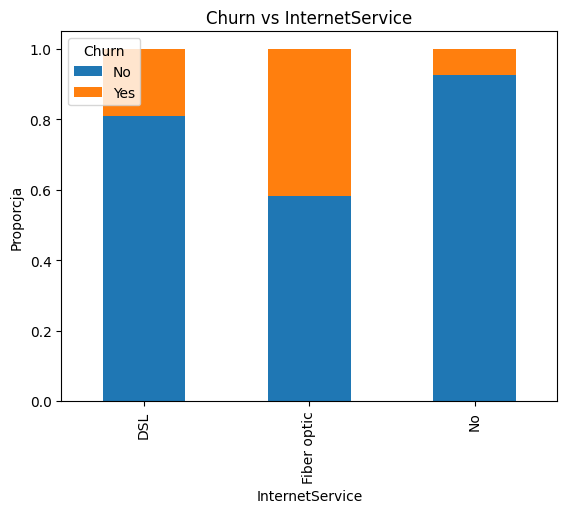

In [8]:
pd.crosstab(df['InternetService'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Churn vs InternetService')
plt.ylabel('Proporcja')
plt.show()

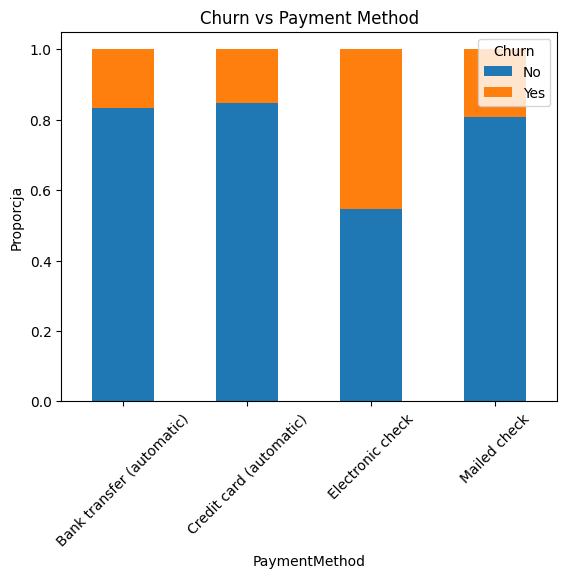

In [9]:
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Churn vs Payment Method')
plt.ylabel('Proporcja')
plt.xticks(rotation=45)
plt.show()


## ðŸ§  Podsumowanie EDA â€“ Telco Customer Churn

W wyniku eksploracyjnej analizy danych odkryto kilka istotnych zaleÅ¼noÅ›ci:

### ðŸ“Œ 1. `MonthlyCharges` vs `Churn`
- Klienci, ktÃ³rzy **odchodzÄ…**, majÄ… zwykle **wyÅ¼sze miesiÄ™czne opÅ‚aty**.
- WyÅ¼sze koszty mogÄ… zwiÄ™kszaÄ‡ ryzyko rezygnacji.

### ðŸ“Œ 2. `tenure` (dÅ‚ugoÅ›Ä‡ umowy) vs `Churn`
- Osoby o krÃ³tkim staÅ¼u (1â€“12 mies.) czÄ™Å›ciej odchodzÄ….
- Klienci, ktÃ³rzy sÄ… z firmÄ… dÅ‚uÅ¼ej, sÄ… bardziej lojalni.
- Dwuszczytowy rozkÅ‚ad wskazuje na dwie grupy: nowych i dÅ‚ugoletnich klientÃ³w.

### ðŸ“Œ 3. UsÅ‚ugi vs `Churn`
- Osoby korzystajÄ…ce z **Fiber optic** i nieposiadajÄ…ce **zabezpieczeÅ„ (OnlineSecurity, TechSupport)** czÄ™Å›ciej rezygnujÄ….
- Brak usÅ‚ug pomocniczych moÅ¼e zwiÄ™kszaÄ‡ frustracjÄ™ klienta.

### ðŸ“Œ 4. `PaymentMethod` vs `Churn`
- Klienci pÅ‚acÄ…cy przez **Electronic check** majÄ… wyraÅºnie wyÅ¼szy wskaÅºnik churnu.
- Klienci z **automatycznymi pÅ‚atnoÅ›ciami** (karta kredytowa, bank transfer) sÄ… bardziej lojalni.

---

### âœ… Wnioski:
- Cecha `tenure` i `MonthlyCharges` sÄ… **silnie predykcyjne** â€“ powinny zostaÄ‡ w modelu.
- Kilka zmiennych kategorycznych bÄ™dzie wymagaÅ‚o zakodowania (`OneHotEncoder` lub `LabelEncoder`).
- ZbiÃ³r danych jest gotowy do budowy modelu klasyfikacyjnego churnu.
